# DSC 540
## Project Milestone 2
### Cleaning/Formatting Flat File Source
#### Milan Sherman

Import data from csv

In [1]:
import pandas as pd
football = pd.read_csv(r'C:\Users\milan\Documents\GitHub\DS-540\Term Project\College-Football-Original-Dataset.csv')

In [2]:
football.head()

,"**Includes all FBS teams with stats compiled from espn.com excluding Indiana University (2010-2020), Charlotte (2010-2014), Old Dominion (2019, 2012-10), UAB (2014-2015), UTSA (2010-2011), Appalachian (2010-2013), Coastal Carolina (2010-2016), Georgia Southern (2010-2013), Georgia State (2010-2012), South Alabama (2010-2011), Texas State (2010-2011), Liberty (2010-2017), New Mexico State (2020), UConn (2020), and UMass (2010-2011) since espn.com didn't have available stats for them during the time of this compilation.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,UniversityName,Year,TeamID,CMP,ATT,YDS,CMPPercent,YPA,LNG,TD,INT,SACK,SYL,RTG,R_ATT,R_AVG,TOTAL_PLAYS,RUN_PERCENT,PASS_PERCENT
1,AirForce,2010,AirForce2010,88,168,"1,551",52.40,9.2,63,12,6,5,-25,146.4,748,5.3,916,81.66%,18.34%
2,AirForce,2011,AirForce2011,123,204,"1,821",60.30,8.9,55,16,8,10,-64,153.3,723,5.7,927,77.99%,22.01%
3,AirForce,2012,AirForce2012,83,151,"1,334",55.00,8.8,58,9,8,9,-46,138.2,804,5.1,955,84.19%,15.81%
4,AirForce,2013,AirForce2013,93,174,"1,259",53.40,7.2,71,8,4,9,-79,124.8,637,4.9,811,78.55%,21.45%


### Step 1: Remove header

The first row of the data appears to contain information about the dataset.  In particular, which teams are missing from the data for which years.  As a result, the field names are the first row of the data frame.  I will skip the first row of the data frame when importing to address this.

In [3]:
football = pd.read_csv(r'C:\Users\milan\Documents\GitHub\DS-540\Term Project\College-Football-Original-Dataset.csv', skiprows = 1)

In [4]:
football.head()

,UniversityName,Year,TeamID,CMP,ATT,YDS,CMPPercent,YPA,LNG,TD,INT,SACK,SYL,RTG,R_ATT,R_AVG,TOTAL_PLAYS,RUN_PERCENT,PASS_PERCENT
0,AirForce,2010,AirForce2010,88,168,"1,551",52.4,9.2,63,12,6,5,-25,146.4,748,5.3,916,81.66%,18.34%
1,AirForce,2011,AirForce2011,123,204,"1,821",60.3,8.9,55,16,8,10,-64,153.3,723,5.7,927,77.99%,22.01%
2,AirForce,2012,AirForce2012,83,151,"1,334",55.0,8.8,58,9,8,9,-46,138.2,804,5.1,955,84.19%,15.81%
3,AirForce,2013,AirForce2013,93,174,"1,259",53.4,7.2,71,8,4,9,-79,124.8,637,4.9,811,78.55%,21.45%
4,AirForce,2014,AirForce2014,117,206,"1,893",56.8,9.2,74,15,4,12,-80,154.1,796,4.5,1002,79.44%,20.56%


In [5]:
football.shape

(1372, 19)

The dataframe has 1372 observations and 19 fields.  

### Step 2: Check for missing values

In [6]:
football.isnull().sum()

UniversityName    0
Year              0
TeamID            0
CMP               0
ATT               0
YDS               0
CMPPercent        0
YPA               0
LNG               0
TD                0
INT               0
SACK              0
SYL               0
RTG               0
R_ATT             0
R_AVG             0
TOTAL_PLAYS       0
RUN_PERCENT       0
PASS_PERCENT      0
dtype: int64

There are no NaNs in the dataset

### Step 3: Check Data Types
Check that the data types of each field are accurate representations of the data that they contain

In [7]:
football.dtypes

UniversityName     object
Year                int64
TeamID             object
CMP                 int64
ATT                 int64
YDS                object
CMPPercent        float64
YPA               float64
LNG                 int64
TD                  int64
INT                 int64
SACK                int64
SYL                 int64
RTG               float64
R_ATT               int64
R_AVG             float64
TOTAL_PLAYS         int64
RUN_PERCENT        object
PASS_PERCENT       object
dtype: object

Run and pass percentage (RUN_PERCENT, PASS_PERCENT, which represent the proportion of running and passing plays out of all offensive plays) appear to be categorical and are displayed as a percentage.  Yards (YDS, representing passing yards) also appears to be categorical and has a comma separator for thousands.  These fields will all need to be numerical or integer for analysis and/or model building.

Remove extraneous characters and convert to integer or numeric

In [8]:
# create a function to clean the character columns
import re
def processString(txt):
#     remove punctuation
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for ele in txt:
        if ele in punc:
            txt = txt.replace(ele, '')
    return(txt)

In [9]:
# strip extraneous characters
football['passing_yds'] = football.apply(lambda row: processString(row.YDS), axis = 1)
football['run_pct'] = football.apply(lambda row: processString(row.RUN_PERCENT), axis = 1)
football['pass_pct'] = football.apply(lambda row: processString(row.PASS_PERCENT), axis = 1)

In [10]:
# convert passing yards to integer and run and pass percent to numeric
football['passing_yds'] = football['passing_yds'].astype(int)
football['run_pct'] = football['run_pct'].astype(float)
football['pass_pct'] = football['pass_pct'].astype(float)

In [11]:
# removing the formatting of the percentage columns left them as four digit numbers
# here I divide them by 100 and round to one decimal to represent as a number between 0 and 100
football['run_pct'] = football.apply(lambda row: row.run_pct/100.0, axis = 1)
football['run_pct'] = football['run_pct'].round(decimals = 1)
football['pass_pct'] = football.apply(lambda row: row.pass_pct/100.0, axis = 1)
football.pass_pct = football.pass_pct.round(decimals = 1)
football.head()

,UniversityName,Year,TeamID,CMP,ATT,YDS,CMPPercent,YPA,LNG,TD,...,SYL,RTG,R_ATT,R_AVG,TOTAL_PLAYS,RUN_PERCENT,PASS_PERCENT,passing_yds,run_pct,pass_pct
0,AirForce,2010,AirForce2010,88,168,"1,551",52.4,9.2,63,12,...,-25,146.4,748,5.3,916,81.66%,18.34%,1551,81.7,18.3
1,AirForce,2011,AirForce2011,123,204,"1,821",60.3,8.9,55,16,...,-64,153.3,723,5.7,927,77.99%,22.01%,1821,78.0,22.0
2,AirForce,2012,AirForce2012,83,151,"1,334",55.0,8.8,58,9,...,-46,138.2,804,5.1,955,84.19%,15.81%,1334,84.2,15.8
3,AirForce,2013,AirForce2013,93,174,"1,259",53.4,7.2,71,8,...,-79,124.8,637,4.9,811,78.55%,21.45%,1259,78.6,21.4
4,AirForce,2014,AirForce2014,117,206,"1,893",56.8,9.2,74,15,...,-80,154.1,796,4.5,1002,79.44%,20.56%,1893,79.4,20.6


### Step 4: Clean up columns
Drop old columns, and put data back order.  Run and pass percentage were at the end of the dataframe, so dropping the old columns should leave them in the same place. I think that the passing_yds column should come after CMPPercent, which is slightly different than the original order. This puts passing yards with the other passing metrics, but puts CMPPercent after completions and attempts as it the ratio of those two columns.

In [12]:
# drop old columns
football = football.drop(['YDS', 'RUN_PERCENT', 'PASS_PERCENT'], axis = 1)

In [13]:
# pull the columns names as a list, and use that list to rearrange the column names order
cols = list(football.columns.values)
new_cols = ['UniversityName',
 'Year',
 'TeamID',
 'CMP',
 'ATT',
 'CMPPercent',
 'passing_yds',
 'YPA',
 'LNG',
 'TD',
 'INT',
 'SACK',
 'SYL',
 'RTG',
 'R_ATT',
 'R_AVG',
 'TOTAL_PLAYS',
 'run_pct',
 'pass_pct']

In [14]:
# update the dataframe with the new order
football = football[new_cols]
football.head()

,UniversityName,Year,TeamID,CMP,ATT,CMPPercent,passing_yds,YPA,LNG,TD,INT,SACK,SYL,RTG,R_ATT,R_AVG,TOTAL_PLAYS,run_pct,pass_pct
0,AirForce,2010,AirForce2010,88,168,52.4,1551,9.2,63,12,6,5,-25,146.4,748,5.3,916,81.7,18.3
1,AirForce,2011,AirForce2011,123,204,60.3,1821,8.9,55,16,8,10,-64,153.3,723,5.7,927,78.0,22.0
2,AirForce,2012,AirForce2012,83,151,55.0,1334,8.8,58,9,8,9,-46,138.2,804,5.1,955,84.2,15.8
3,AirForce,2013,AirForce2013,93,174,53.4,1259,7.2,71,8,4,9,-79,124.8,637,4.9,811,78.6,21.4
4,AirForce,2014,AirForce2014,117,206,56.8,1893,9.2,74,15,4,12,-80,154.1,796,4.5,1002,79.4,20.6


### Step 5: Rename Columns
Rename some of the columns to either make them more descriptive or lower case when the column name is not an abbreviation

In [15]:
football.rename(columns = {'CMP':'completions', 
                           'ATT':'attempts', 
                           'SYL':'sack_yds_lost', 
                           'RTG':'passer_rating',
                           'R_ATT':'run_attempts',
                           'R_AVG':'run_YPA', 
                           'TOTAL_PLAYS':'total_plays'}, inplace = True)

In [16]:
football.head()

,UniversityName,Year,TeamID,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,SACK,sack_yds_lost,passer_rating,run_attempts,run_YPA,total_plays,run_pct,pass_pct
0,AirForce,2010,AirForce2010,88,168,52.4,1551,9.2,63,12,6,5,-25,146.4,748,5.3,916,81.7,18.3
1,AirForce,2011,AirForce2011,123,204,60.3,1821,8.9,55,16,8,10,-64,153.3,723,5.7,927,78.0,22.0
2,AirForce,2012,AirForce2012,83,151,55.0,1334,8.8,58,9,8,9,-46,138.2,804,5.1,955,84.2,15.8
3,AirForce,2013,AirForce2013,93,174,53.4,1259,7.2,71,8,4,9,-79,124.8,637,4.9,811,78.6,21.4
4,AirForce,2014,AirForce2014,117,206,56.8,1893,9.2,74,15,4,12,-80,154.1,796,4.5,1002,79.4,20.6


In [17]:
# check the datatype and field names for the current dataframe
football.dtypes

UniversityName     object
Year                int64
TeamID             object
completions         int64
attempts            int64
CMPPercent        float64
passing_yds         int32
YPA               float64
LNG                 int64
TD                  int64
INT                 int64
SACK                int64
sack_yds_lost       int64
passer_rating     float64
run_attempts        int64
run_YPA           float64
total_plays         int64
run_pct           float64
pass_pct          float64
dtype: object

### Step 6: Check for duplicates
Check for duplicate rows in the dataframe

In [18]:
# there are no duplicate rows
football.duplicated().sum()

0

### Step 7: Check for outliers
Generate boxplots for each of the numerical features in the dataframe to check for outliers and/or erroneous data

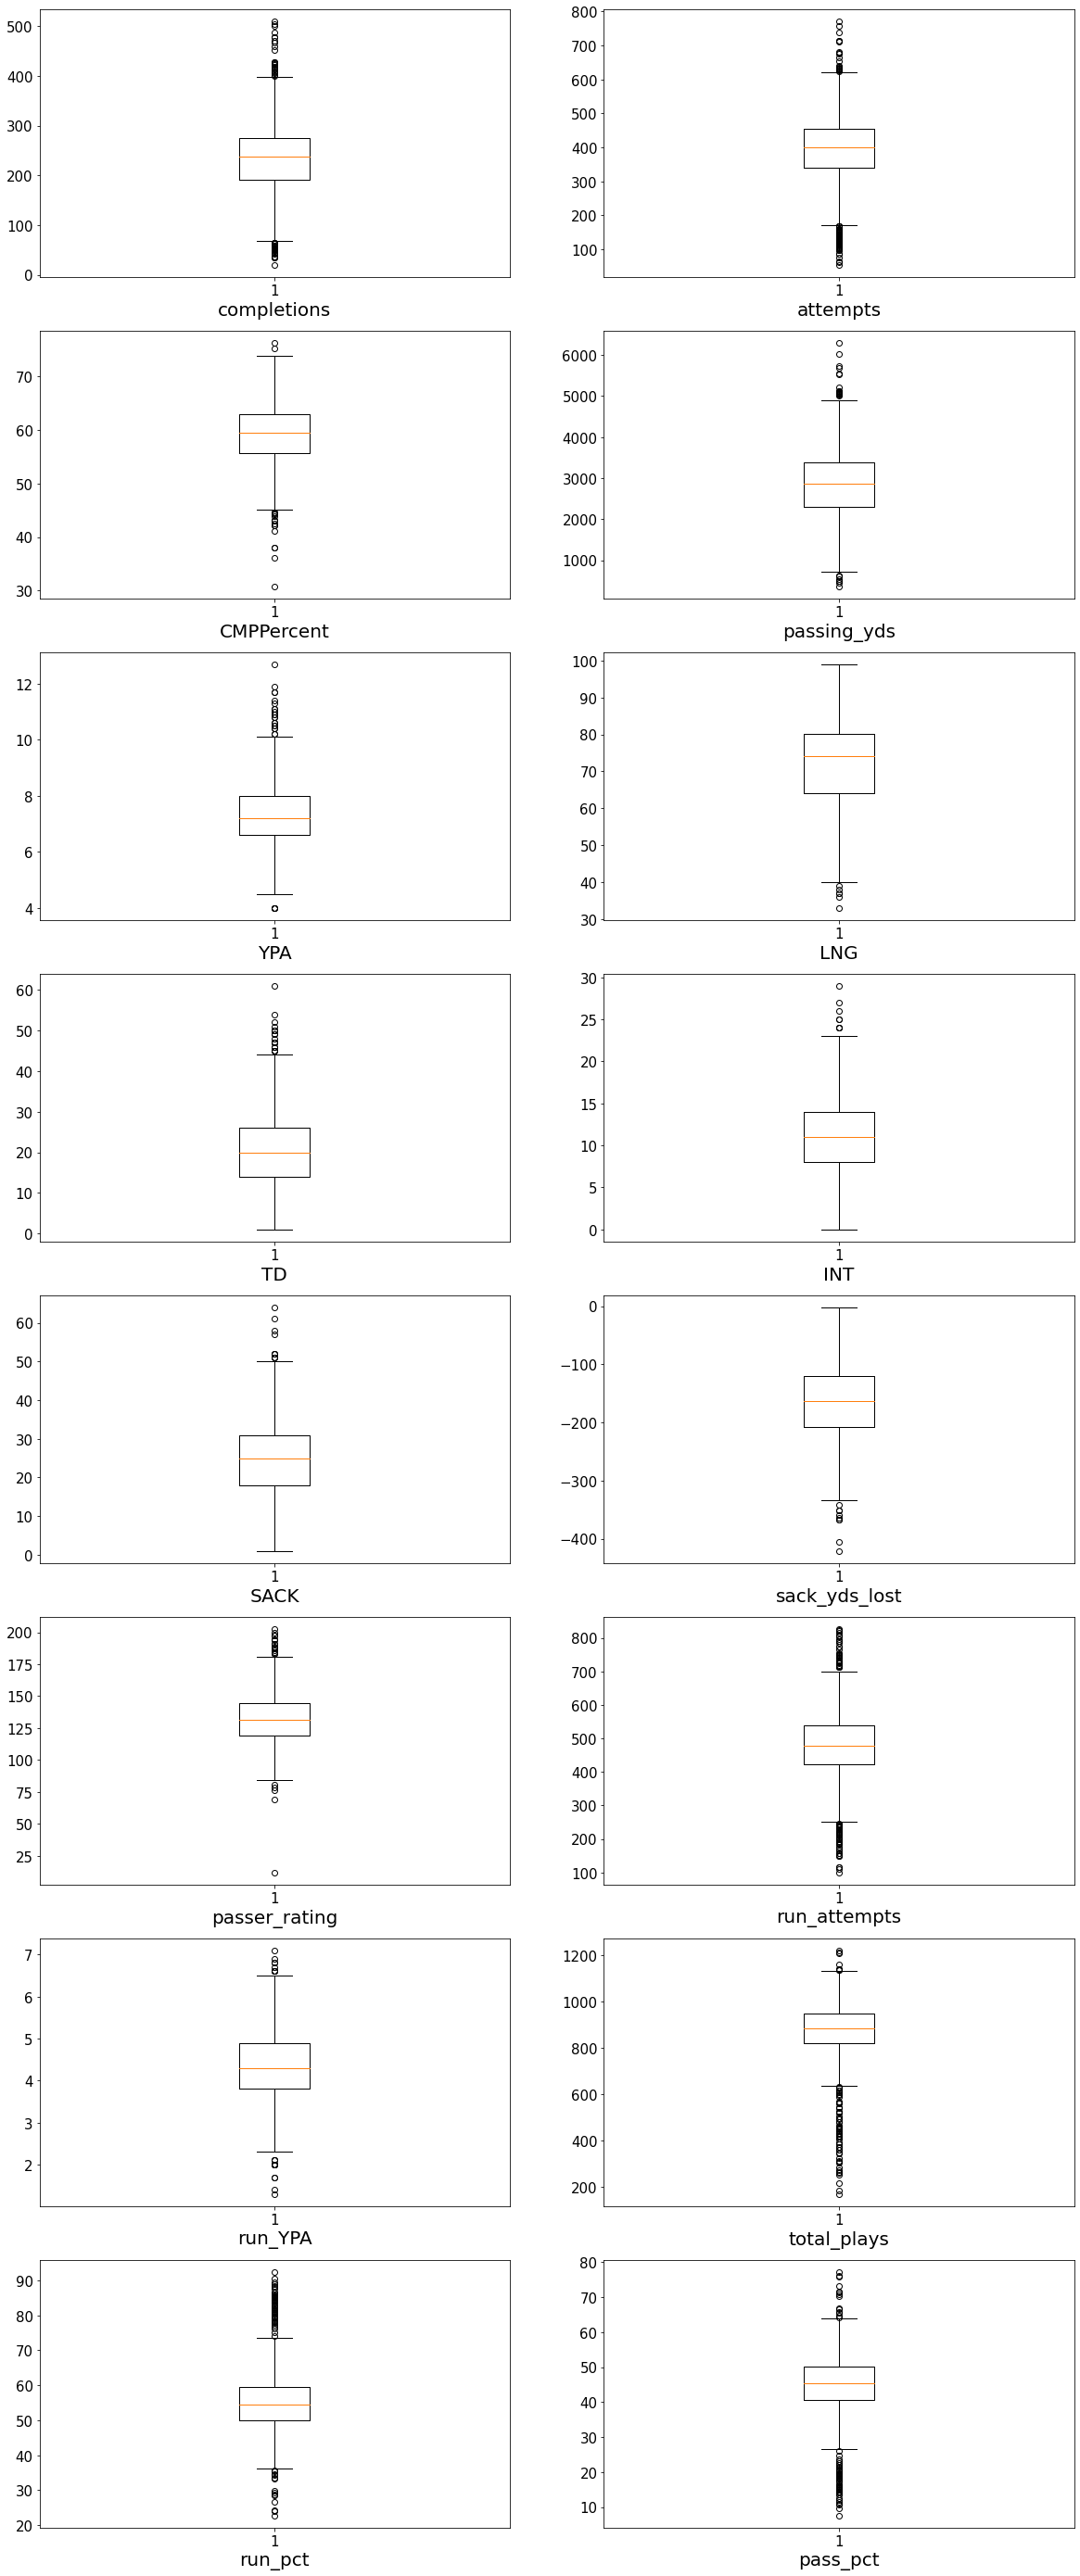

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#set the figure size
plt.rcParams['figure.figsize'] = (20, 50)
# make subplots
fig, axes = plt.subplots(nrows = 8, ncols = 2)
# Specify the features of interest
features = list(football.columns.values)
# the first three fields are team, year, and team ID
num_features = features[3:]
xaxes = num_features

axes[0,0]
# draw boxplots
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(football[num_features[idx]].dropna())
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

A quick check of the boxplots confirms the following:
1. Percentages are between 0 and 100
2. There are no single plays longer than 100 yards (the length of the field)
3. Passer rating is within the bounds of that metric

While there do appear to be outliers, for each of the metrics, it is expected that aggregating these metrics by team for an entire season will result in some unusual values over a ten year period. With the exception of one case, the outliers connected to the rest of the distribution, and thus while unusual, are not impossible and therefore should not be excluded. What the boxplots allow us to confirm is that none of the values is impossible. 

The one exception to the above is a passer rating that is well below any other value for this metric, which I investigate below.

In [20]:
football.passer_rating.sort_values()

217      12.0
91       69.1
160      76.6
907      78.8
1186     80.9
        ...  
801     194.9
30      197.3
528     197.4
31      199.6
800     202.7
Name: passer_rating, Length: 1372, dtype: float64

In [21]:
outlier = football[football['passer_rating'] < 50]
outlier

,UniversityName,Year,TeamID,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,SACK,sack_yds_lost,passer_rating,run_attempts,run_YPA,total_plays,run_pct,pass_pct
217,Cincinnati,2016,Cincinnati2016,259,453,57.2,3071,6.8,82,19,15,26,-176,12.0,397,3.6,850,46.7,53.3


The University of Cincinnati had a passer rating of 12 in 2016.  I am going to check this value using the metric that go into passer rating, i.e., passing yards, touchdowns, completions, and interceptions

In [22]:
outlier['pass_rater_new'] = outlier.apply(lambda row: (row.passing_yds*8.4 + row.TD*330 + row.completions*100 - row.INT*200)/row.attempts, axis = 1)

C:\Users\milan\AppData\Local\Temp/ipykernel_5152/3540053366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['pass_rater_new'] = outlier.apply(lambda row: (row.passing_yds*8.4 + row.TD*330 + row.completions*100 - row.INT*200)/row.attempts, axis = 1)


In [23]:
outlier

,UniversityName,Year,TeamID,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,SACK,sack_yds_lost,passer_rating,run_attempts,run_YPA,total_plays,run_pct,pass_pct,pass_rater_new
217,Cincinnati,2016,Cincinnati2016,259,453,57.2,3071,6.8,82,19,15,26,-176,12.0,397,3.6,850,46.7,53.3,121.338631


I got a different number, leading me to believe that this could be a misplaced decimal point.  I am going to recalculate passer rating for every row and compare the calculated value with the data in the original column

In [24]:
football['pass_rater_new'] = football.apply(lambda row: (row.passing_yds*8.4 + row.TD*330 + row.completions*100 - row.INT*200)/row.attempts, axis = 1)
football['pass_rater_diff'] = football.apply(lambda row: abs(row.passer_rating - row.pass_rater_new), axis = 1)
football.pass_rater_diff.sort_values()

646       0.000000
1135      0.000000
448       0.000000
506       0.000000
899       0.000000
           ...    
32        7.989176
920       8.088177
127       8.179758
1177      8.195833
217     109.338631
Name: pass_rater_diff, Length: 1372, dtype: float64

There appear to be a number of columns with a difference of 0 (and our outlier off by 109).  Below I check how many are off by more than one.

In [25]:
football[football['pass_rater_diff'] > 1]

,UniversityName,Year,TeamID,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,...,SACK,sack_yds_lost,passer_rating,run_attempts,run_YPA,total_plays,run_pct,pass_pct,pass_rater_new,pass_rater_diff
10,AirForce,2020,AirForce2020,34,61,55.7,502,8.0,49,3,...,2,-19,129.3,312,5.0,373,83.6,16.4,131.259016,1.959016
21,Akron,2020,Akron2020,83,148,56.1,838,5.0,42,4,...,26,-162,98.9,212,4.0,360,58.9,41.1,104.454054,5.554054
32,Alabama,2020,Alabama2020,324,425,76.2,4656,10.0,90,42,...,19,-116,191.0,477,5.0,902,52.9,47.1,198.989176,7.989176
39,AppalachianState,2020,AppalachianState2020,190,300,63.3,2245,7.0,62,21,...,21,-131,137.9,545,5.0,845,64.5,35.5,141.960000,4.060000
50,Arizona,2020,Arizona2020,114,189,60.3,1065,5.0,75,6,...,18,-118,105.4,184,4.0,373,49.3,50.7,110.719577,5.319577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,WesternKentucky,2020,WesternKentucky2020,208,369,56.4,1972,5.0,51,12,...,27,-167,106.9,389,3.0,758,51.3,48.7,109.823306,2.923306
1338,WesternMichigan,2020,WesternMichigan2020,100,157,63.7,1719,10.0,85,18,...,7,-46,183.0,235,4.0,392,60.0,40.0,190.952866,7.952866
1349,WestVirginia,2020,WestVirginia2020,253,401,63.1,2775,6.0,70,16,...,21,-142,124.7,358,3.0,759,47.2,52.8,132.394015,7.694015
1360,Wisconsin,2020,Wisconsin2020,124,202,61.4,1267,6.0,53,10,...,12,-72,121.2,293,3.0,495,59.2,40.8,123.479208,2.279208


While less than 10%, this is enough to justify using the passer rating from the calculated column rather than the orginal data

In [26]:
# drop the original passer rating field and the difference field
football.drop(['passer_rating', 'pass_rater_diff'], axis = 1, inplace = True)

In [27]:
# rename the calcuted column
football.rename(columns = {'pass_rater_new':'passer_rating'}, inplace = True)

In [28]:
# reorder the columns to put passer rating after the rest of the passing metric, since it's based on those
# pull the columns names as a list, and use that list to rearrange the column names order
cols = list(football.columns.values)
cols

['UniversityName',
 'Year',
 'TeamID',
 'completions',
 'attempts',
 'CMPPercent',
 'passing_yds',
 'YPA',
 'LNG',
 'TD',
 'INT',
 'SACK',
 'sack_yds_lost',
 'run_attempts',
 'run_YPA',
 'total_plays',
 'run_pct',
 'pass_pct',
 'passer_rating']

In [29]:
new_cols = ['UniversityName',
 'Year',
 'TeamID',
 'completions',
 'attempts',
 'CMPPercent',
 'passing_yds',
 'YPA',
 'LNG',
 'TD',
 'INT',
 'passer_rating',
 'SACK',
 'sack_yds_lost',
 'run_attempts',
 'run_YPA',
 'total_plays',
 'run_pct',
 'pass_pct']

In [30]:
football = football[new_cols]
football.head()

,UniversityName,Year,TeamID,completions,attempts,CMPPercent,passing_yds,YPA,LNG,TD,INT,passer_rating,SACK,sack_yds_lost,run_attempts,run_YPA,total_plays,run_pct,pass_pct
0,AirForce,2010,AirForce2010,88,168,52.4,1551,9.2,63,12,6,146.359524,5,-25,748,5.3,916,81.7,18.3
1,AirForce,2011,AirForce2011,123,204,60.3,1821,8.9,55,16,8,153.315686,10,-64,723,5.7,927,78.0,22.0
2,AirForce,2012,AirForce2012,83,151,55.0,1334,8.8,58,9,8,138.249007,9,-46,804,5.1,955,84.2,15.8
3,AirForce,2013,AirForce2013,93,174,53.4,1259,7.2,71,8,4,124.802299,9,-79,637,4.9,811,78.6,21.4
4,AirForce,2014,AirForce2014,117,206,56.8,1893,9.2,74,15,4,154.132039,12,-80,796,4.5,1002,79.4,20.6


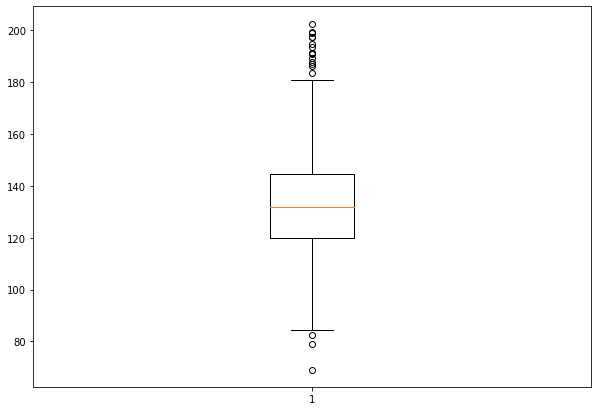

In [31]:
# quick check of the boxplot again
import matplotlib.pyplot as plt
import numpy as np

# first drop observations with NaN in the visit column 
fig = plt.figure(figsize =(10, 7))
plt.boxplot(football.passer_rating)
plt.show()

While it's possible that other columns in the dataframe that are based on other metrics could be off as well, the boxplots of the other columns did not reveal any obvious points to investigate like this one did.

In [32]:
import os
os.chdir(r'C:\Users\milan\Documents\GitHub\DS-540\Term Project')
football.to_csv('offense_stats.csv')